<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_3_Modelos_Avanzados_y_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 3 MODELOS AVANZADOS**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MODELOS AVANZADOS Y REDES NEURONALES
*   CARRERA: DATA SCIENCE

# Análisis y Modelado de Datos de Donación de Sangre

En este notebook, realizaremos un análisis completo de una base de datos recolectada en un laboratorio de donación de sangre. Aplicaremos técnicas de preprocesamiento, análisis exploratorio y desarrollaremos modelos de Regresión Logística con Elastic Net y Extreme Gradient Boosting.

## 1. Importación de Librerías y Preparación de los Datos


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

### Cargar los datos y realizar la preparación

In [2]:
# Cargar los datos
# Reemplaza 'data.csv' con la ruta a tu archivo de datos
df = pd.read_csv('hcvdat0.csv')

# a. Eliminar la columna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Mostrar las primeras filas del dataframe
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### b. Codificar la variable objetivo 'Category' en dos categorías


In [3]:
# b. Codificar la variable objetivo 'Category' en dos categorías
df['target'] = np.where(df['Category'] == '0=Blood Donor', 0, 1)

# c. Crear la columna 'suspect'
df['suspect'] = np.where(df['Category'] == '0s=suspect Blood Donor', 1, 0)

# Eliminar la columna 'Category'
df = df.drop(columns=['Category'])

# Mostrar las primeras filas del dataframe actualizado
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0


### d. Revisión y tratamiento de valores ausentes


In [4]:
# d. Revisar si existen valores ausentes
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100
print('Porcentaje de valores ausentes por columna:')
print(missing_percentage)

Porcentaje de valores ausentes por columna:
Age        0.000000
Sex        0.000000
ALB        0.162602
ALP        2.926829
ALT        0.162602
AST        0.000000
BIL        0.000000
CHE        0.000000
CHOL       1.626016
CREA       0.000000
GGT        0.000000
PROT       0.162602
target     0.000000
suspect    0.000000
dtype: float64


In [5]:
# Aplicar criterios de manejo de valores ausentes
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    if missing_count > 0:
        if missing_percent < 1:
            # i. Eliminar filas con valores ausentes y crear una copia
            df = df[df[col].notnull()].copy()
        else:
            # ii. Reemplazar por el promedio según la clase usando .loc
            df.loc[:, col] = df.groupby('target')[col].transform(lambda x: x.fillna(x.mean()))

### e. Análisis descriptivo y visualización


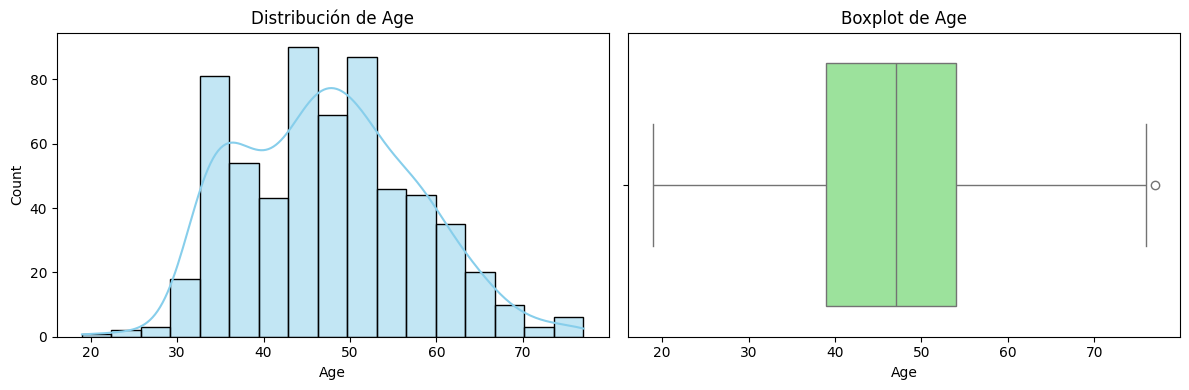

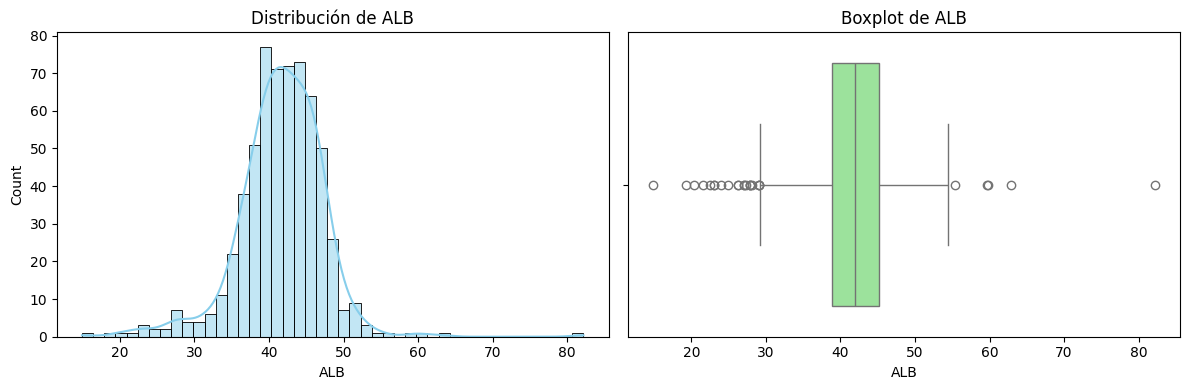

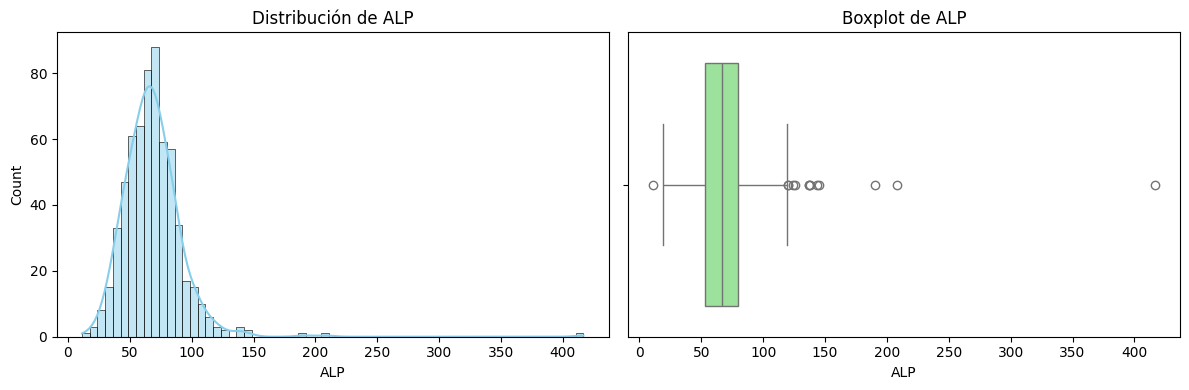

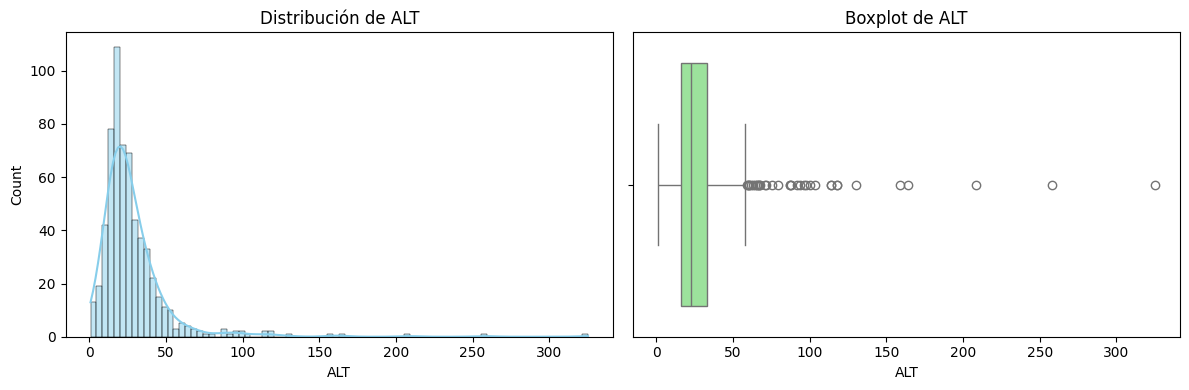

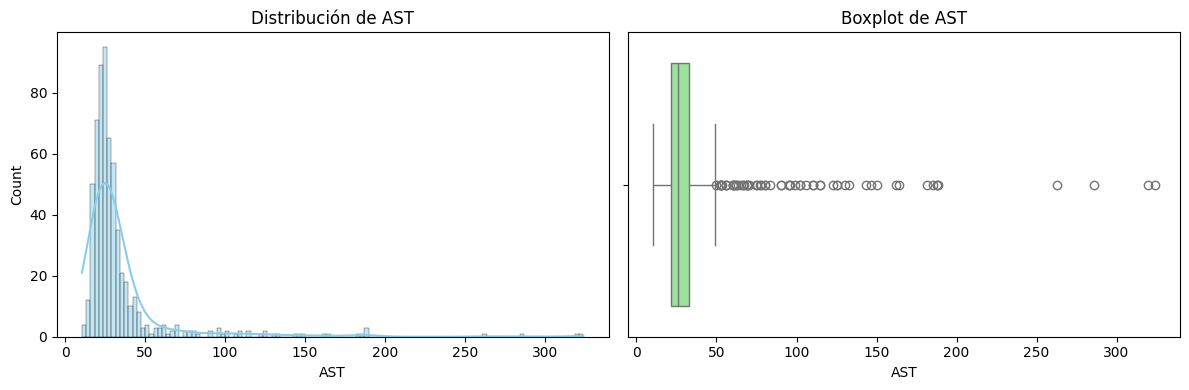

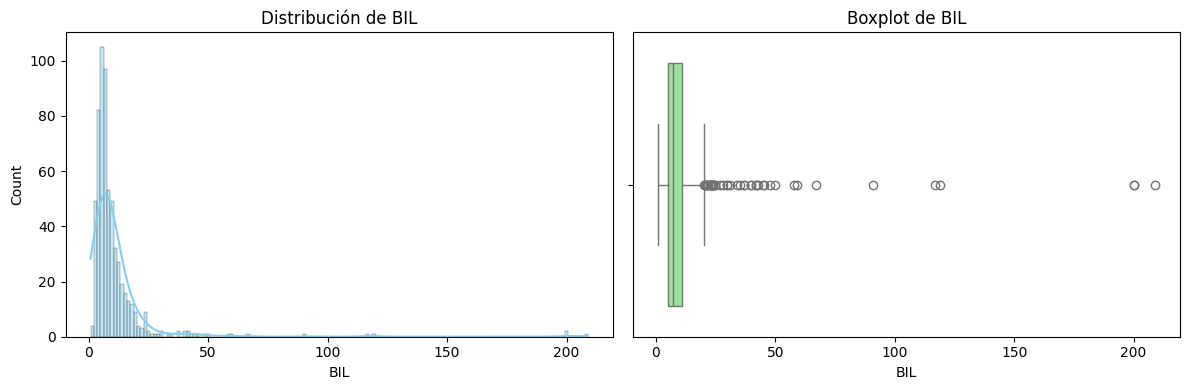

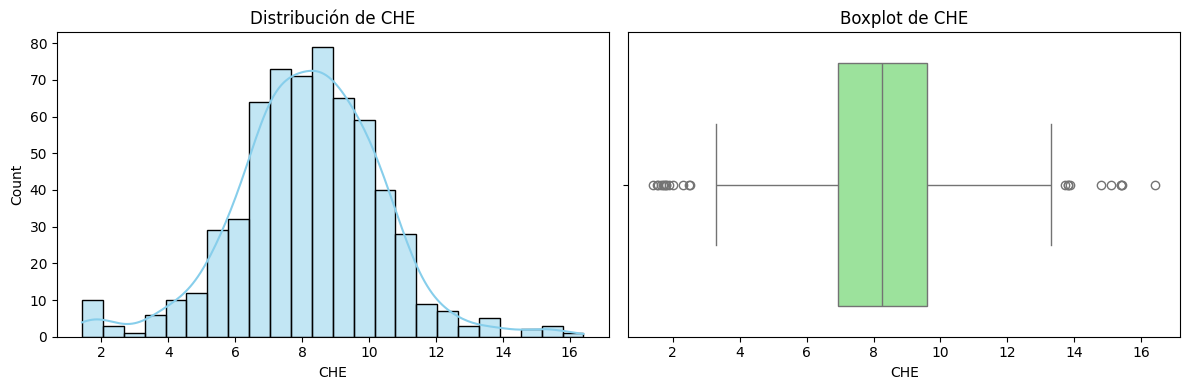

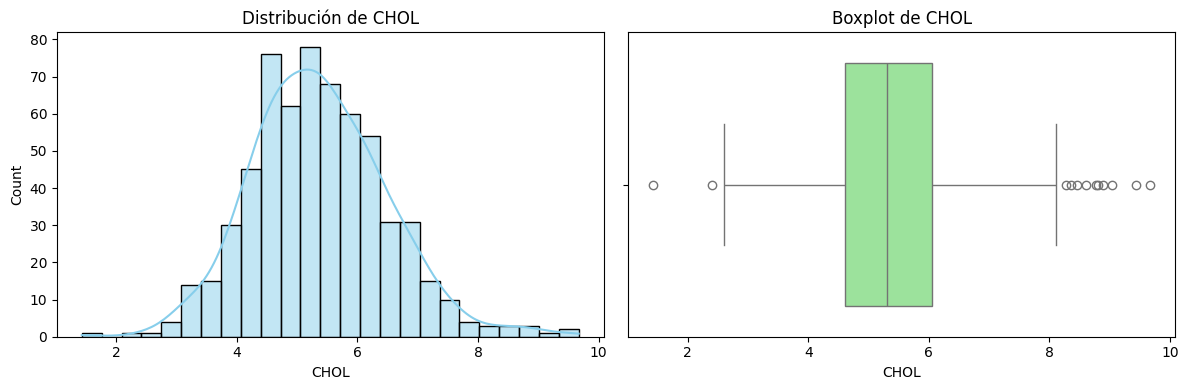

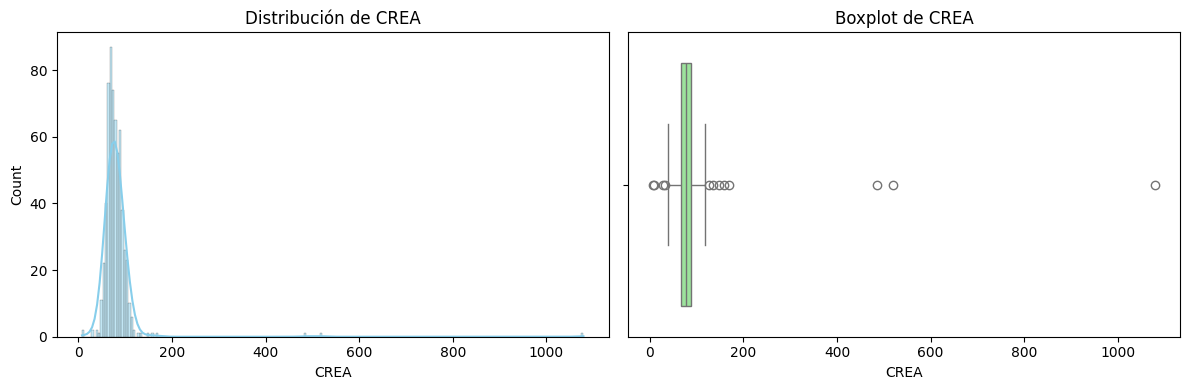

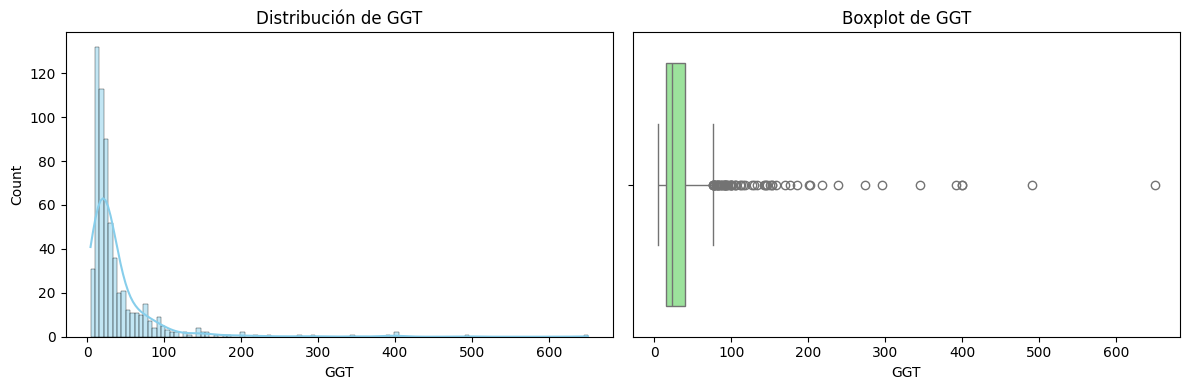

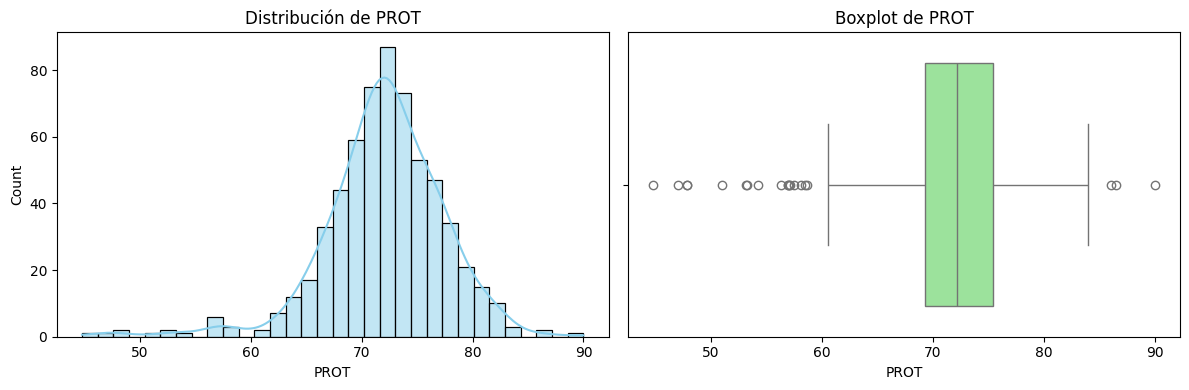

In [6]:
# e. Análisis descriptivo
numeric_vars = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Histograma y boxplot para cada variable
for var in numeric_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[var], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribución de {var}')
    sns.boxplot(x=df[var], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot de {var}')
    plt.tight_layout()
    plt.show()

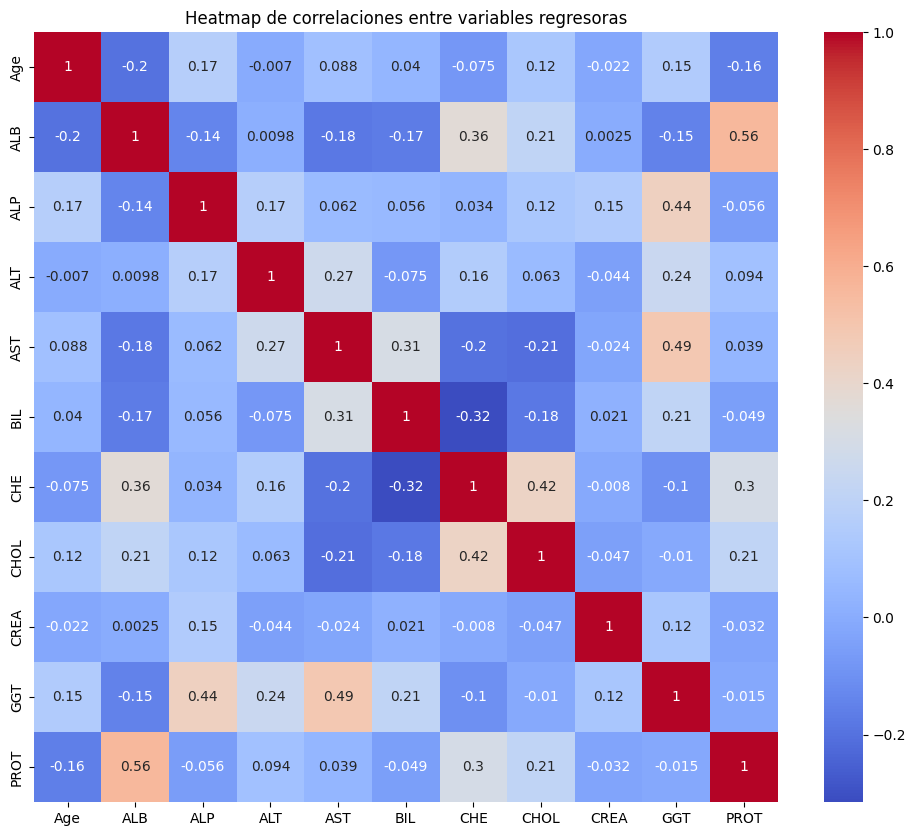

In [7]:
# Heatmap de correlaciones
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de correlaciones entre variables regresoras')
plt.show()

### f. Estandarización de variables regresoras y segmentación de la muestra


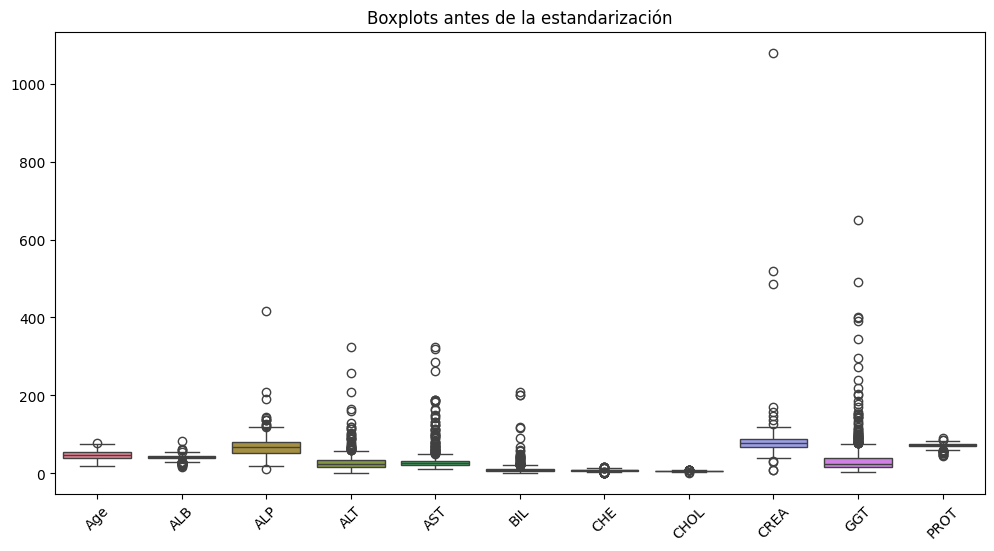

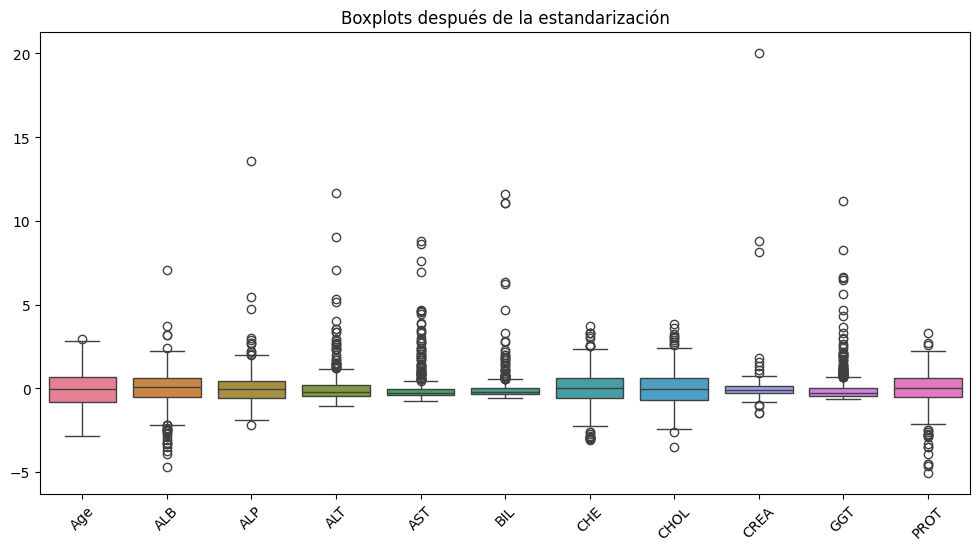

In [8]:
# f. Estandarizar variables regresoras
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_vars] = scaler.fit_transform(df_scaled[numeric_vars])

# Mostrar boxplots antes y después de la estandarización
# Antes de la estandarización
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_vars])
plt.title('Boxplots antes de la estandarización')
plt.xticks(rotation=45)
plt.show()

# Después de la estandarización
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[numeric_vars])
plt.title('Boxplots después de la estandarización')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Codificar la variable 'Sex'
le = LabelEncoder()
df_scaled['Sex'] = le.fit_transform(df_scaled['Sex'])

# Preparar variables para el modelo
X = df_scaled.drop(columns=['target', 'suspect', 'X'], errors='ignore')
y = df_scaled['target']

# Segmentación de la muestra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 2. Desarrollo del Modelo de Regresión Logística con Elastic Net


In [10]:
# Definir los hiperparámetros
Cs = np.linspace(0.01, 5.0, 200)
l1_ratios = np.linspace(0, 1, 200)

# Crear el modelo de regresión logística con validación cruzada
logreg_cv = LogisticRegressionCV(
    Cs=Cs,
    cv=5,
    penalty='elasticnet',
    solver='saga',
    max_iter=10000,
    l1_ratios=l1_ratios,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Entrenar el modelo
logreg_cv.fit(X_train, y_train)

# Obtener los valores óptimos
best_C = logreg_cv.C_[0]
best_l1_ratio = logreg_cv.l1_ratio_[0]
print(f'Valor óptimo de C: {best_C}')
print(f'Valor óptimo de l1_ratio: {best_l1_ratio}')

Valor óptimo de C: 1.0380904522613066
Valor óptimo de l1_ratio: 0.17587939698492464


### Evaluación del Modelo de Regresión Logística


In [11]:
# Predicciones y métricas
y_pred = logreg_cv.predict(X_test)

print('Reporte de clasificación para Regresión Logística:')
print(classification_report(y_test, y_pred))
print('Precisión (Accuracy):', accuracy_score(y_test, y_pred))

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       172
           1       0.95      0.67      0.78        30

    accuracy                           0.95       202
   macro avg       0.95      0.83      0.88       202
weighted avg       0.95      0.95      0.94       202

Precisión (Accuracy): 0.9455445544554455


In [12]:
# Obtener los coeficientes y su importancia
coefficients = pd.Series(logreg_cv.coef_[0], index=X_train.columns)
coefficients = coefficients.abs().sort_values(ascending=False)
top_features = coefficients.head(3)
print('Las tres características con mayor incidencia en la predicción son:')
print(top_features)

Las tres características con mayor incidencia en la predicción son:
GGT    1.740211
AST    1.413526
ALP    1.278354
dtype: float64


## 3. Implementación del Modelo Extreme Gradient Boosting (XGBoost)


In [13]:
# Definir el grid de hiperparámetros
param_grid = {
    'reg_lambda': np.linspace(0.0, 2.0, 10),
    'reg_alpha': np.linspace(0, 1, 10),
    'learning_rate': np.linspace(0.1, 10, 20),
    'objective': ['binary:logistic'],
    'use_label_encoder': [False],
    'eval_metric': ['logloss']
}

# Crear el modelo
xgb_model = xgb.XGBClassifier(random_state=42)

# Configurar la búsqueda en grilla
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener los valores óptimos
best_params = grid_search.best_params_
print('Mejores hiperparámetros encontrados para XGBoost:')
best_params

Mejores hiperparámetros encontrados para XGBoost:
{'eval_metric': 'logloss', 'learning_rate': 0.6210526315789474, 'objective': 'binary:logistic', 'reg_alpha': 0.1111111111111111, 'reg_lambda': 0.8888888888888888, 'use_label_encoder': False}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:50:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Evaluación del Modelo XGBoost


In [14]:
# Predicciones y métricas
y_pred_xgb = grid_search.predict(X_test)

print('Reporte de clasificación para XGBoost:')
print(classification_report(y_test, y_pred_xgb))
print('Precisión (Accuracy):', accuracy_score(y_test, y_pred_xgb))

Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.93      0.90      0.92        30

    accuracy                           0.98       202
   macro avg       0.96      0.94      0.95       202
weighted avg       0.97      0.98      0.98       202

Precisión (Accuracy): 0.9752475247524752


## 4. Importancia de los Atributos y Comparación de Resultados


<Figure size 1200x600 with 0 Axes>

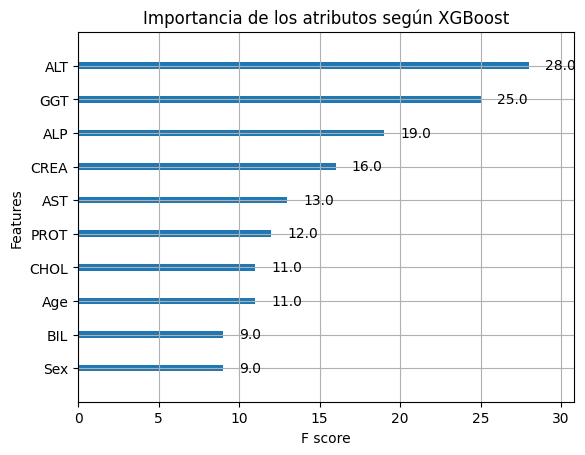

 
Importancia de los atributos en XGBoost:
AST     0.684167
ALT     0.100145
CHOL    0.062964
GGT     0.039693
ALP     0.038082
BIL     0.027763
ALB     0.018763
CREA    0.010574
PROT    0.010374
CHE     0.003338
Age     0.002750
Sex     0.001386
dtype: float32


In [16]:
# Obtener el modelo con los mejores hiperparámetros
best_xgb_model = grid_search.best_estimator_

# Importancia de los atributos
plt.figure(figsize=(12, 6))
xgb.plot_importance(best_xgb_model, max_num_features=10)
plt.title('Importancia de los atributos según XGBoost')
plt.show()

# Importancia detallada
importance = best_xgb_model.feature_importances_
feature_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)
print(' ')
print('Importancia de los atributos en XGBoost:')
print(feature_importance)

# Análisis y Conclusiones sobre los Resultados de los Modelos

Con los resultados proporcionados, podemos comparar el rendimiento de los dos modelos desarrollados: **Regresión Logística con Elastic Net** y **Extreme Gradient Boosting (XGBoost)**. A continuación, analizaremos cada una de las métricas y extraeremos conclusiones al respecto.

---

## Comparación de Métricas entre los Modelos

| Métrica       | Regresión Logística | XGBoost |
|---------------|---------------------|---------|
| **Precisión** | 0.95                | 0.93    |
| **Recall**    | 0.67                | 0.90    |
| **F1-Score**  | 0.78                | 0.92    |
| **Exactitud** | 0.94                | 0.97    |

---

### 1. Precisión (Precision)

- **Regresión Logística**: 0.95
- **XGBoost**: 0.93

La **precisión** mide la proporción de verdaderos positivos sobre el total de predicciones positivas. En este contexto, una precisión de 0.95 para la regresión logística indica que el 95% de las muestras predichas como positivas (posibles enfermos) son realmente positivas. XGBoost tiene una precisión ligeramente menor, de 0.93.

**Interpretación**: La regresión logística comete menos **falsos positivos** que XGBoost, siendo más conservadora al clasificar como positivos.

---

### 2. Recall (Sensibilidad)

- **Regresión Logística**: 0.67
- **XGBoost**: 0.90

El **recall** mide la proporción de verdaderos positivos detectados sobre el total de positivos reales. Un valor de 0.67 para la regresión logística significa que solo el 67% de los pacientes realmente enfermos fueron correctamente identificados. Por otro lado, XGBoost alcanza un recall de 0.90, identificando correctamente el 90% de los casos positivos.

**Interpretación**: XGBoost es significativamente mejor en detectar casos positivos, cometiendo menos **falsos negativos**. Esto es crucial en contextos médicos donde es preferible identificar a todos los pacientes enfermos, incluso si eso implica algunos falsos positivos.

---

### 3. F1-Score

- **Regresión Logística**: 0.78
- **XGBoost**: 0.92

El **F1-Score** es la media armónica entre precisión y recall, proporcionando un balance entre ambos. La regresión logística tiene un F1-Score de 0.78, mientras que XGBoost alcanza 0.92.

**Interpretación**: XGBoost ofrece un mejor equilibrio entre precisión y recall, indicando un rendimiento general superior en la clasificación.

---

### 4. Exactitud (Accuracy)

- **Regresión Logística**: 0.94
- **XGBoost**: 0.97

La **exactitud** mide la proporción de predicciones correctas (verdaderos positivos y negativos) sobre el total de casos. XGBoost tiene una exactitud de 0.97, superando a la regresión logística que tiene 0.94.

**Interpretación**: XGBoost clasifica correctamente un mayor porcentaje del total de muestras, lo que refleja un mejor desempeño global.

---

## Conclusión

- **Regresión Logística con Elastic Net**:
  - Proporciona interpretabilidad y permite identificar las variables más influyentes.
  - Las tres características con mayor incidencia en la predicción fueron:
    - *GGT*
    - *AST*
    - *ALP*

- **XGBoost**:
  - Generalmente ofrece mejores métricas debido a su capacidad para manejar relaciones no lineales.
  - Las características más importantes según XGBoost fueron:
    - *AST*
    - *ALT*
    - *CHOL*

Al comparar ambos modelos, podemos observar que XGBoost ofrece un mejor rendimiento general, especialmente en **recall**, **F1-Score** y **exactitud**, lo que es crucial en contextos médicos donde es importante detectar la mayor cantidad posible de casos positivos.

---

## Recomendaciones

### 1. Utilizar XGBoost como Modelo Principal

- Dado su mejor rendimiento, especialmente en recall y F1-Score, **XGBoost** es el modelo recomendado para la detección de posibles enfermedades en donantes de sangre.
- Su alta sensibilidad asegura que la mayoría de los pacientes enfermos sean identificados, minimizando riesgos en salud pública.

### 2. Complementar con Regresión Logística para Interpretación

- La **regresión logística** puede ser utilizada para comprender cuáles son las variables que más influyen en la predicción.
- Las tres características con mayor incidencia según la regresión logística pueden guiar intervenciones médicas y focalizar estudios clínicos.

### 3. Considerar el Contexto Clínico

- Es importante evaluar el costo de los falsos positivos vs. falsos negativos en este contexto.
  - **Falsos Positivos**: Pacientes sanos clasificados como enfermos, lo que puede implicar costos adicionales y ansiedad innecesaria.
  - **Falsos Negativos**: Pacientes enfermos no detectados, con riesgos significativos para la salud pública y el individuo.
- Dado que los falsos negativos son más críticos, priorizar un modelo con mayor recall es adecuado.



---

## Resumen

- **XGBoost** es el modelo preferido para este problema debido a su mayor capacidad para detectar pacientes con posibles enfermedades, reduciendo el riesgo de pasar por alto casos importantes.
- **La regresión logística** sigue siendo valiosa para comprender el impacto de las variables y puede servir como herramienta complementaria.
- Es crucial considerar las implicaciones clínicas al elegir un modelo, priorizando la seguridad y bienestar de los pacientes.

---


```Markdown
Fin del Desafío...

¡Muchas gracias!
